In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, stats
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('IBM_HR.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Visualizing the Dataset for better understanding

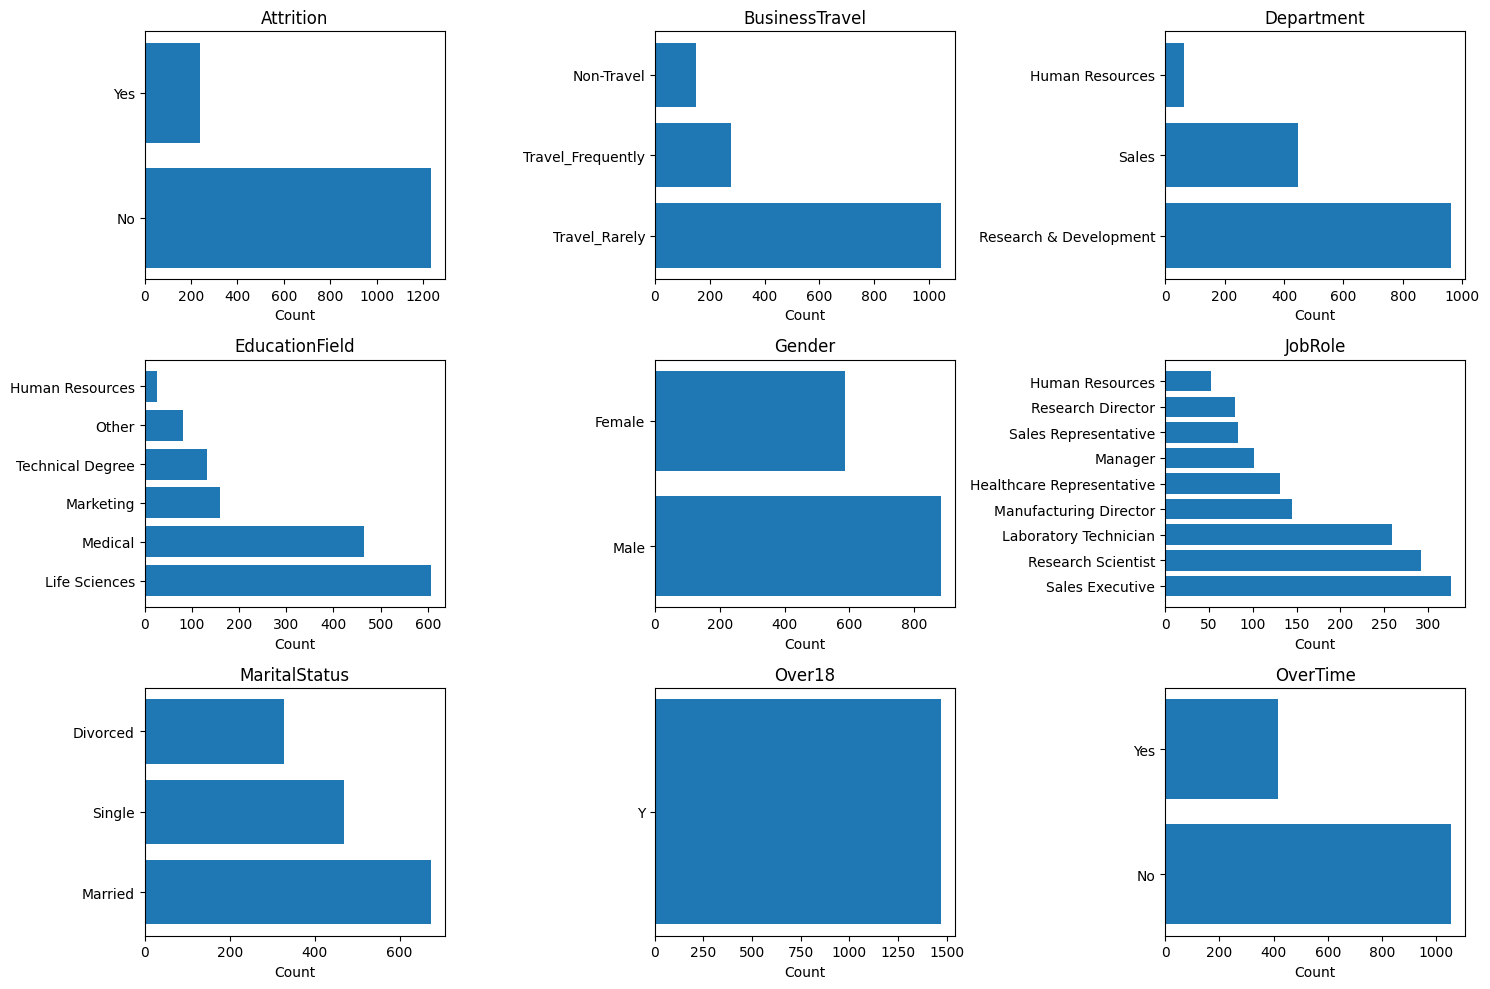

In [ ]:
def plot_categorical_data(data, categorical_features, nrows, ncols, figsize=(15, 10), hspace=0.4, wspace=0.4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    axes = axes.ravel()

    for i, cat_feature in enumerate(categorical_features):
        ax = axes[i]
        categories = data[cat_feature].value_counts().index
        counts = data[cat_feature].value_counts().values
        ax.barh(categories, counts)
        ax.set_title(cat_feature)
        ax.set_xlabel('Count')

    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
plot_categorical_data(df, categorical_features, nrows=3, ncols=3)


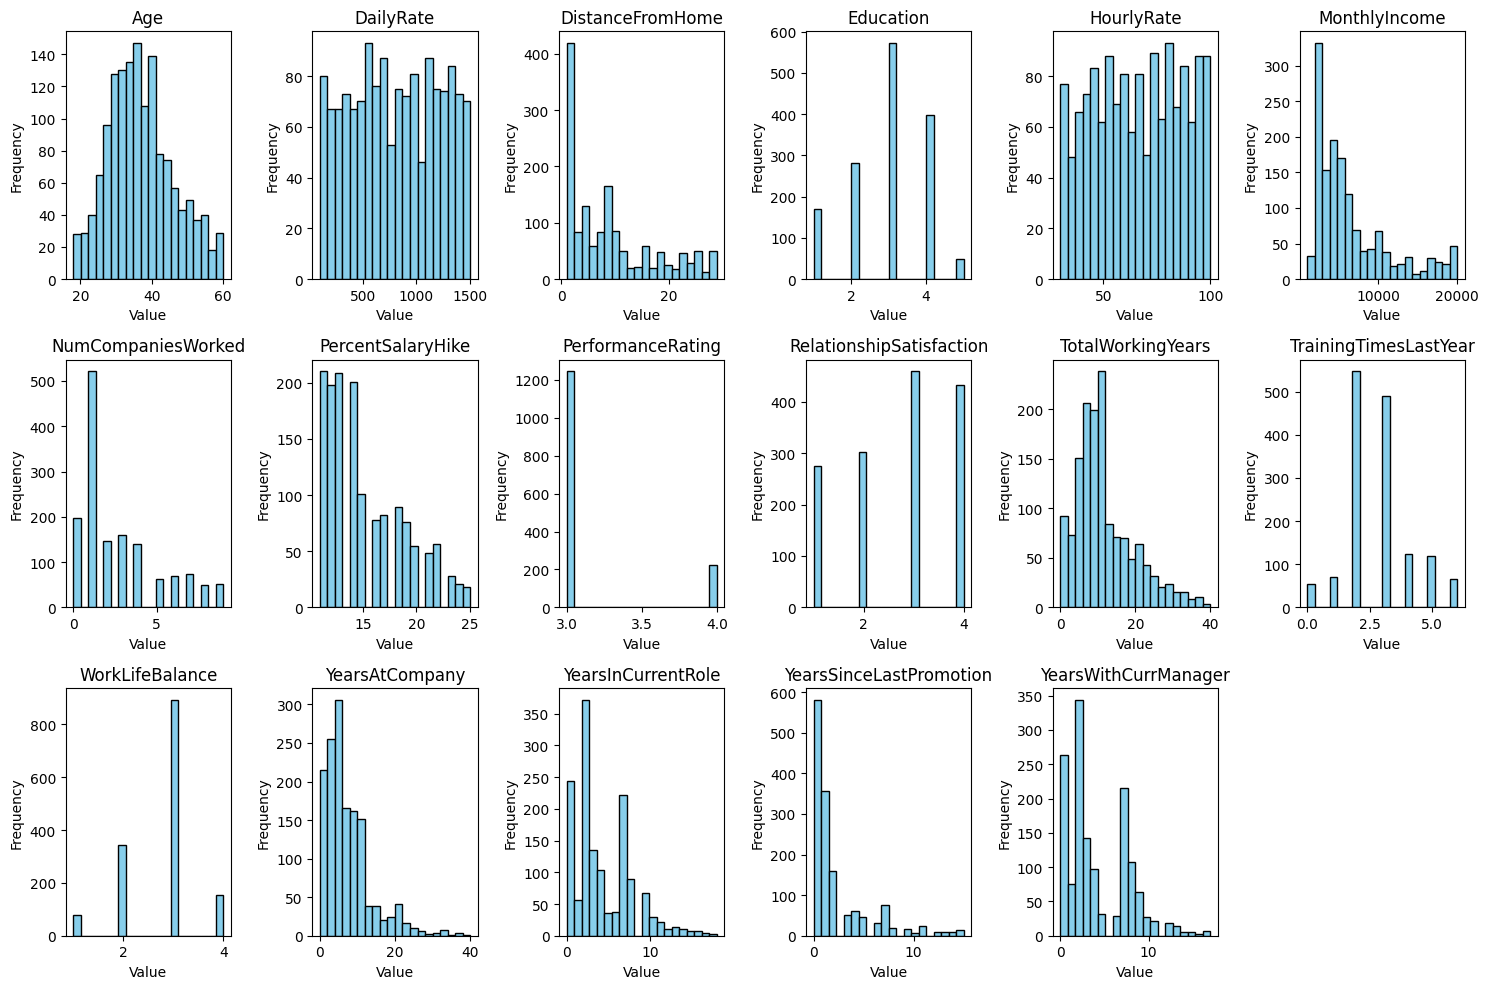

In [ ]:
def plot_numerical_data(data, numerical_features, nrows, ncols, figsize=(15, 10), hspace=0.4, wspace=0.4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    axes = axes.ravel()

    for i, num_feature in enumerate(numerical_features):
        ax = axes[i]
        ax.hist(data[num_feature], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(num_feature)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
plot_numerical_data(df, numerical_features, nrows=3, ncols=6)


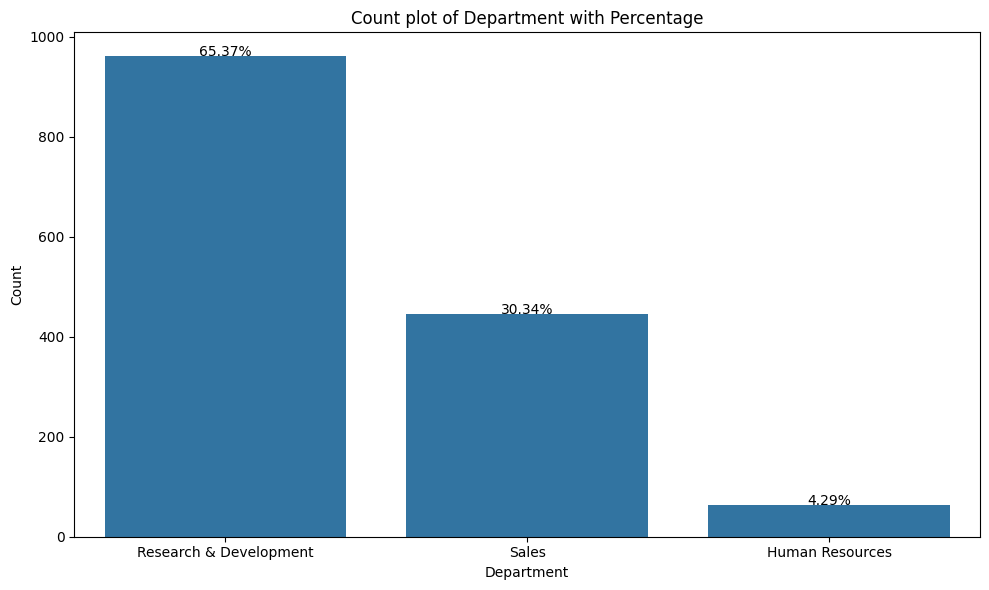

In [ ]:
def plot_categorical_percentage(df, column):
    counts = df[column].value_counts()
    percentages = counts / counts.sum() * 100

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, order=counts.index)

    total = len(df)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5,
                f'{percentages[i]:.2f}%',
                ha="center")

    plt.title(f'Count plot of {column} with Percentage')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_categorical_percentage(df, 'Department')


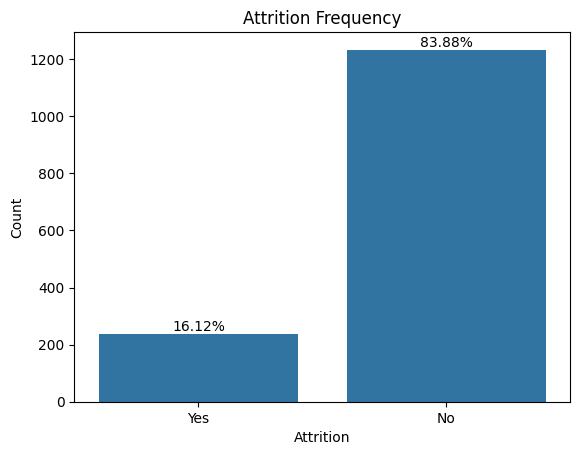

In [ ]:
sns.countplot(x='Attrition', data=df)
counts = df['Attrition'].value_counts()
total = counts.sum()

for bar, count in zip(plt.gca().patches, counts):
    height = bar.get_height()
    percentage = (count / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{round((100-percentage),2)}%", ha='center', va='bottom')

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Frequency')

plt.show()


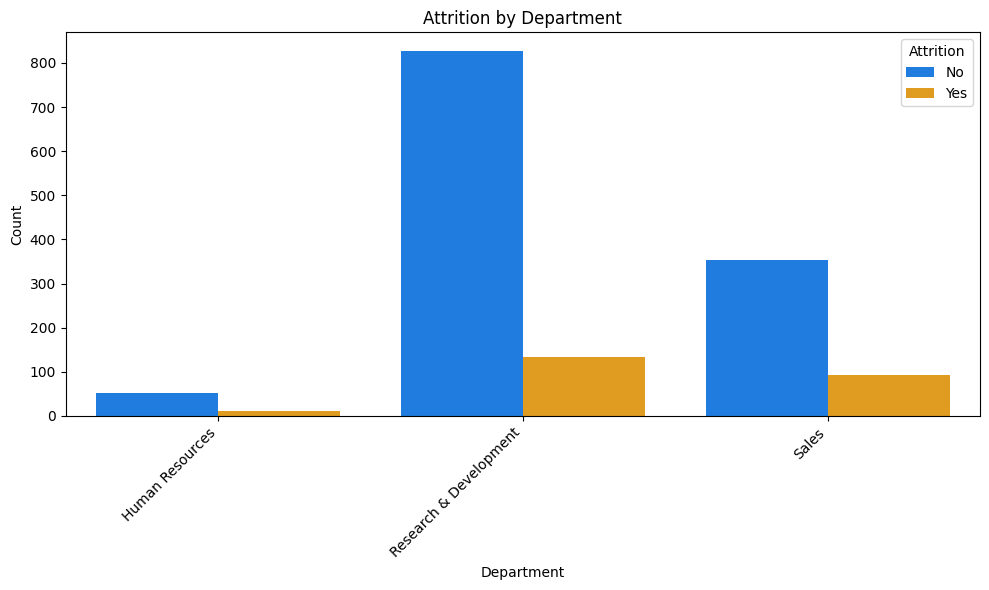

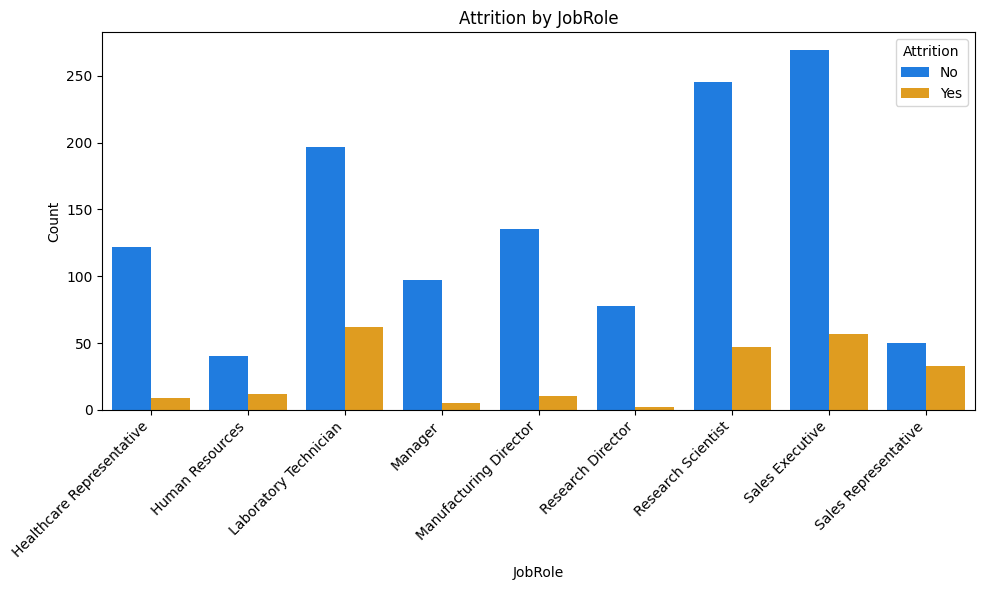

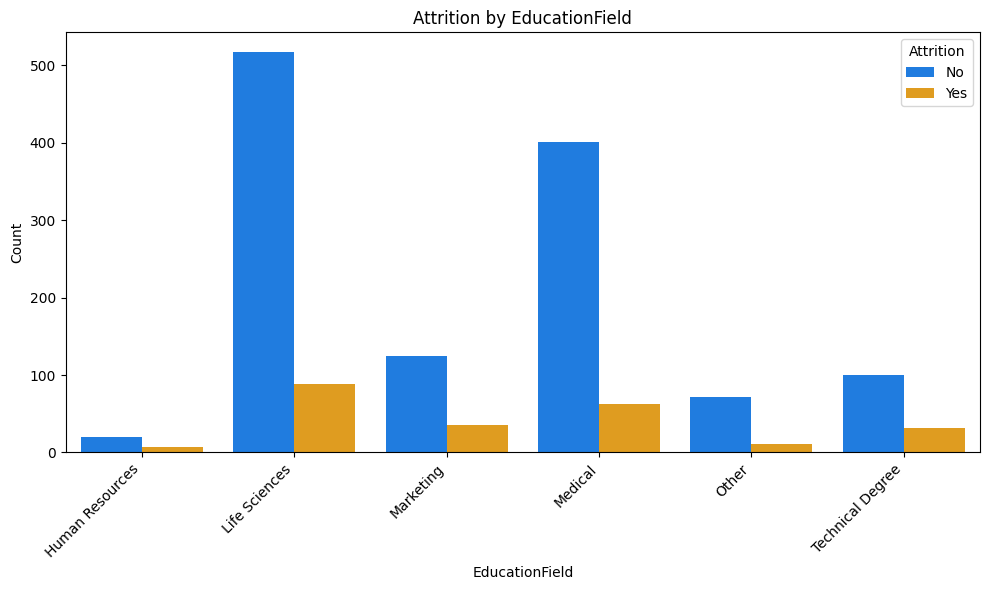

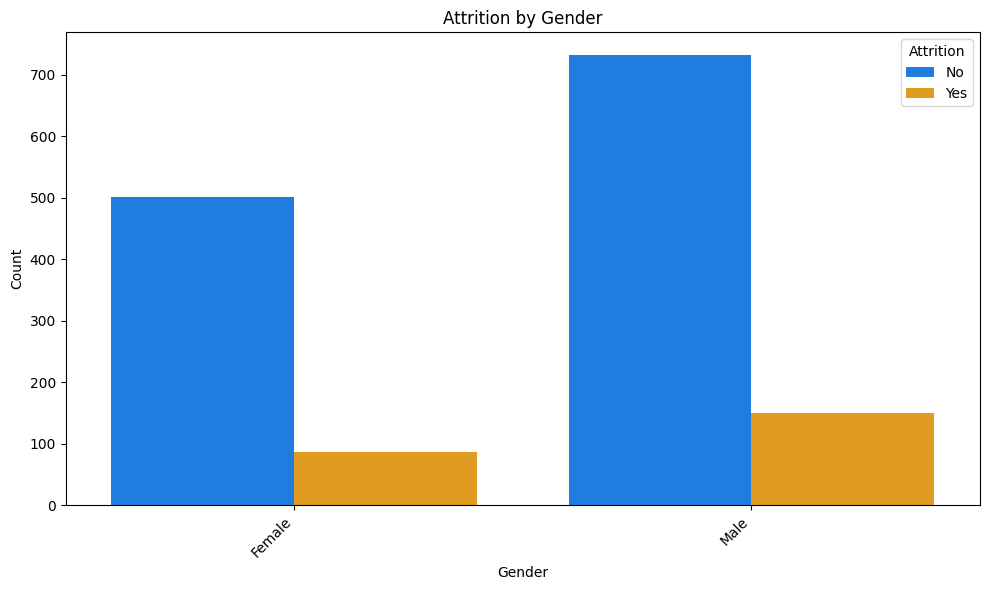

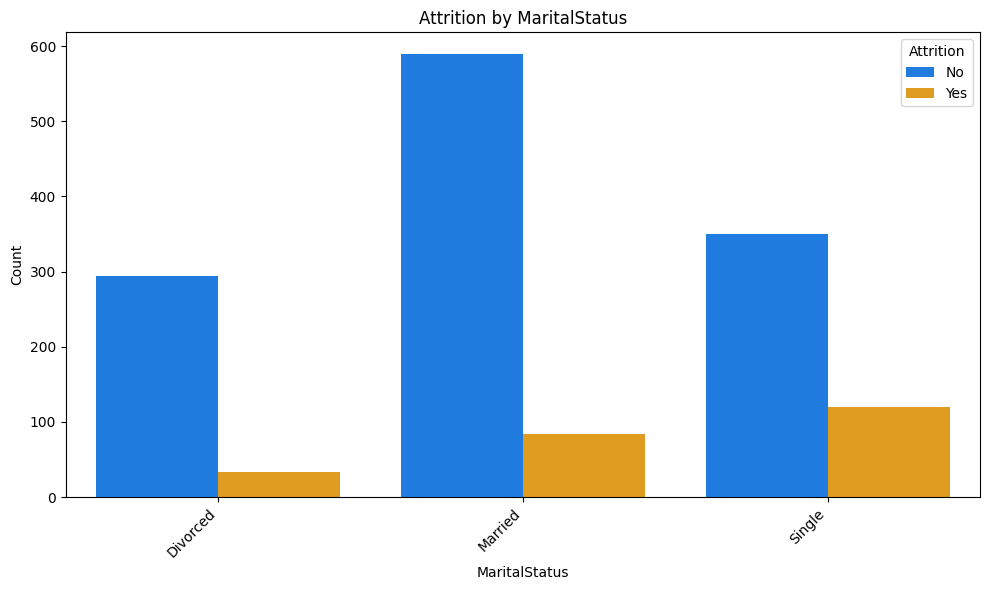

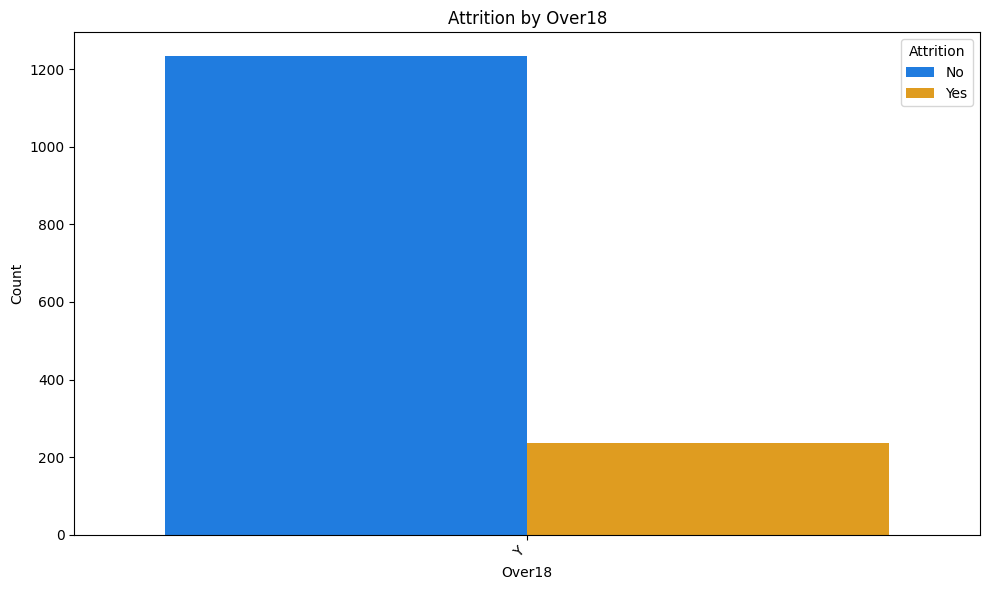

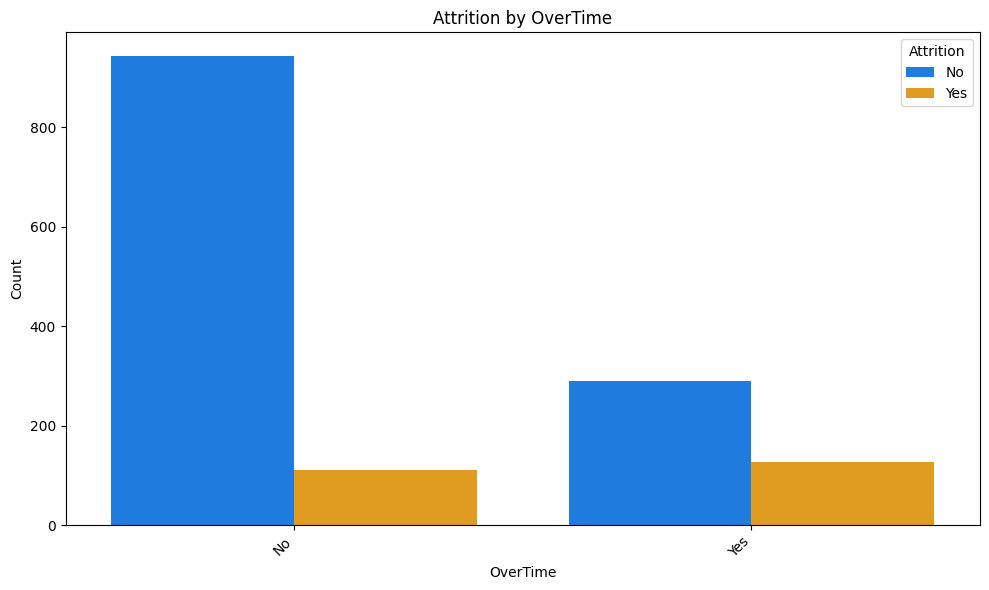

In [ ]:
def plot_categorical_vs_attrition(df, categorical_columns):
    for column in categorical_columns:
        data_count = df.groupby([column, 'Attrition']).size().reset_index(name='n')

        plt.figure(figsize=(10, 6))
        sns.barplot(data=data_count, x=column, y='n', hue='Attrition', ci=None, palette=["#007bff", "#ffa500"])

        plt.xticks(rotation=45, ha='right')

        plt.title(f'Attrition by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

categorical_columns = ['Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus', 'Over18', 'OverTime']
plot_categorical_vs_attrition(df, categorical_columns)


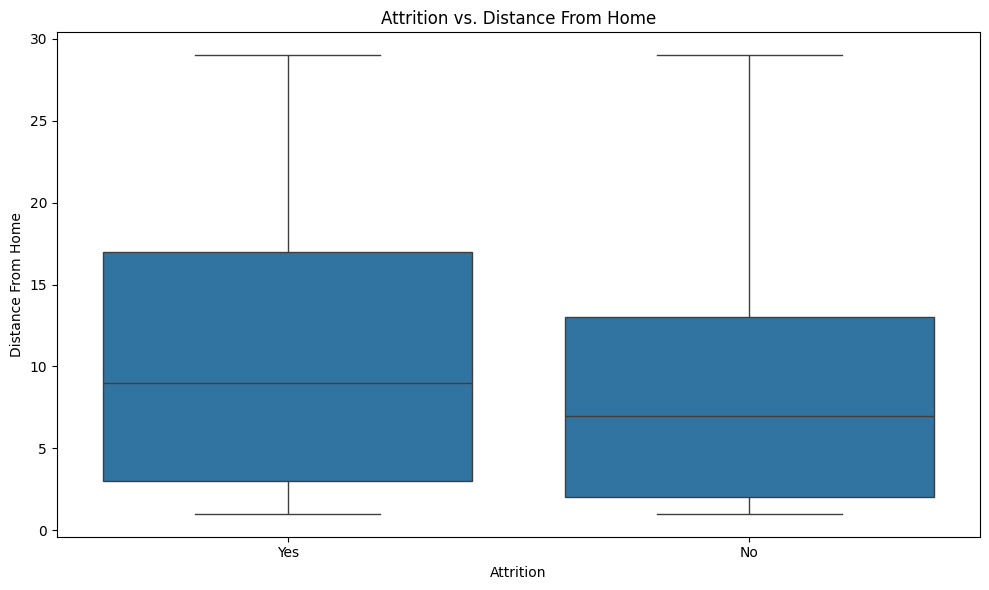

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')

plt.title('Attrition vs. Distance From Home')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')

plt.tight_layout()
plt.show()


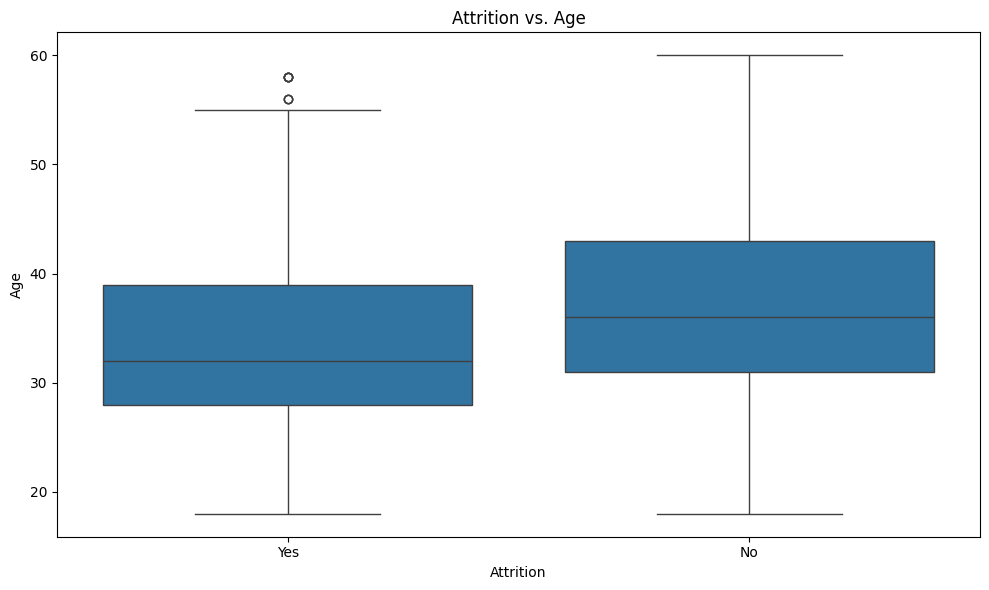

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='Age')

plt.title('Attrition vs. Age')
plt.xlabel('Attrition')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

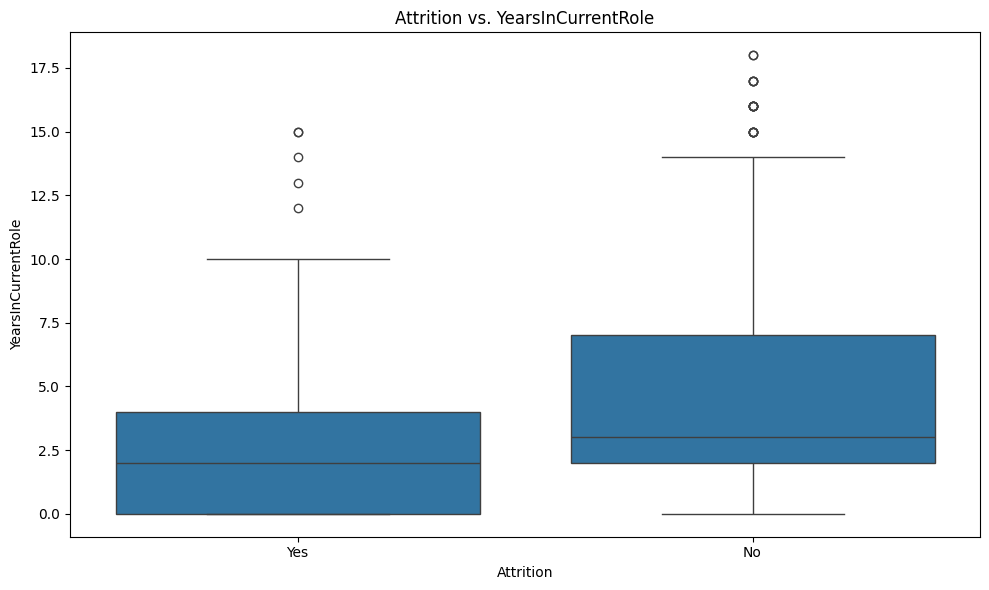

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='YearsInCurrentRole')

plt.title('Attrition vs. YearsInCurrentRole')
plt.xlabel('Attrition')
plt.ylabel('YearsInCurrentRole')

plt.tight_layout()
plt.show()

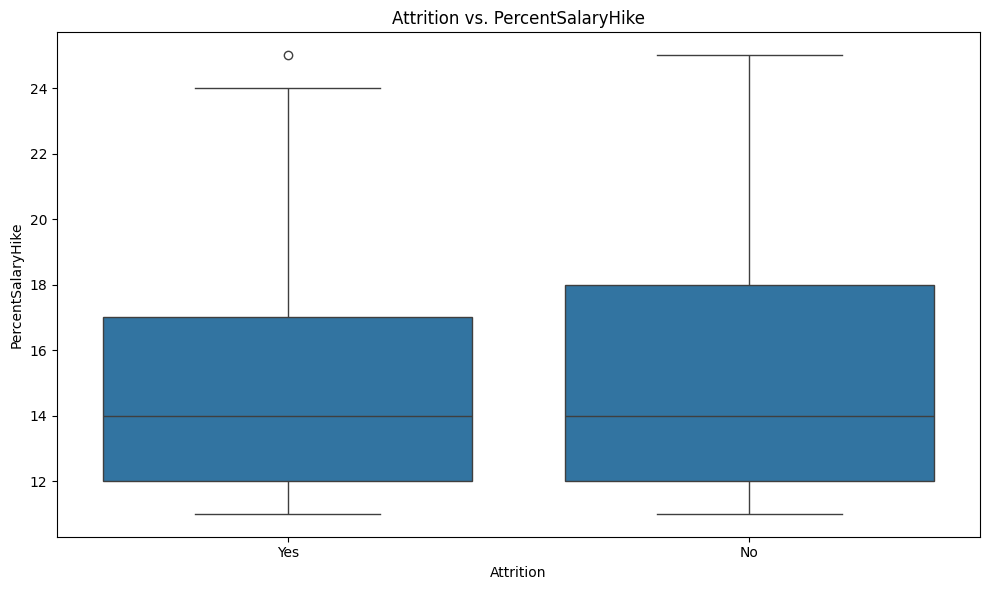

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike')

plt.title('Attrition vs. PercentSalaryHike')
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')

plt.tight_layout()
plt.show()

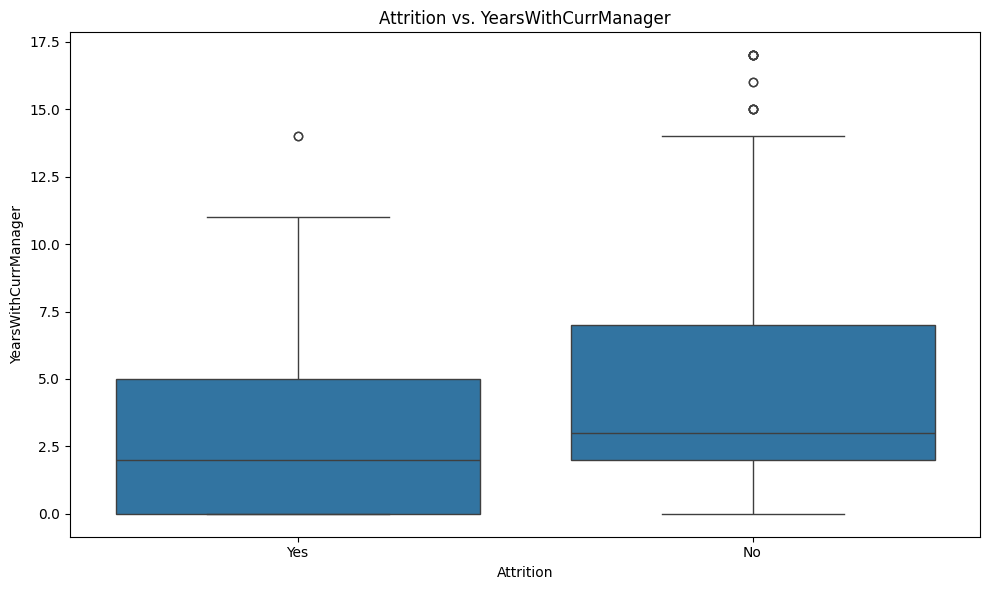

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='YearsWithCurrManager')

plt.title('Attrition vs. YearsWithCurrManager')
plt.xlabel('Attrition')
plt.ylabel('YearsWithCurrManager')

plt.tight_layout()
plt.show()

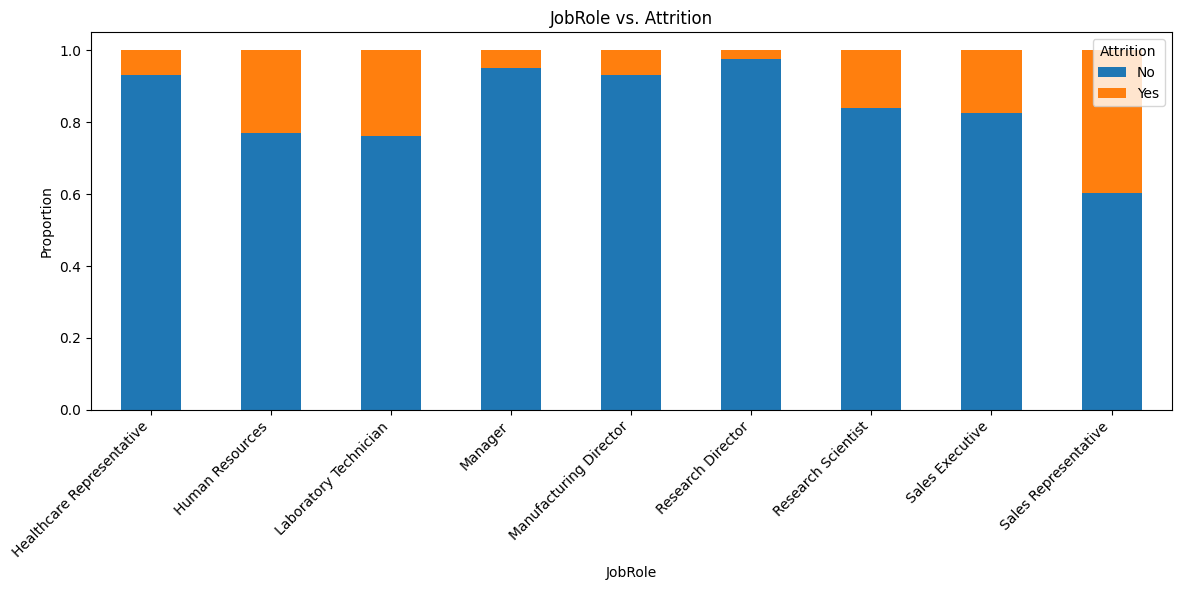

In [ ]:
feature = 'JobRole'
target_feature = 'Attrition'
data = df[[feature, target_feature]]

counts = data.groupby([feature, target_feature]).size().unstack(fill_value=0)
total_counts = counts.sum(axis=1)

proportions = counts.div(total_counts, axis=0)

ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_title(f"{feature} vs. {target_feature}")
ax.set_ylabel("Proportion")
ax.set_xlabel(feature)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Handling Outliers

In [ ]:
def handle_outliers_iqr(data, numerical_features, threshold=1.5):
    data_no_outliers = data.copy()

    for feature in numerical_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        data_no_outliers.loc[(data_no_outliers[feature] < lower_bound) | (data_no_outliers[feature] > upper_bound), feature] = data_no_outliers[feature].median()

    return data_no_outliers


df = handle_outliers_iqr(df, numerical_features)

Handling Missing Values

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Scaling Numerical Features

In [ ]:
def scale_numerical_features(data, numerical_features):
    scaler = StandardScaler()
    data_scaled = data.copy()
    data_scaled[numerical_features] = scaler.fit_transform(data_scaled[numerical_features])
    return data_scaled, scaler

df, scaler = scale_numerical_features(df, numerical_features)


Handling Categorical Features

In [ ]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

#Label Encoding for the target variable 'Attrition'
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])


In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,0.742527,-1.010909,-0.891688,1,1,2,1.383138,3,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,0,-1.297775,-0.147150,-1.868426,1,2,3,-0.240677,2,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1,1.414363,-0.887515,-0.891688,1,4,4,1.284725,2,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,0,1.461466,-0.764121,1.061787,1,5,4,-0.486709,3,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,0,-0.524295,-0.887515,-1.868426,1,7,1,-1.274014,3,...,True,False,False,False,False,False,False,True,False,False


Model Development

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
train_predictions = logistic_model.predict(X_train)
test_predictions = logistic_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Precision
train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)

# Recall
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

# F1-score
train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("Training set metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print()
print("Testing set metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Training set metrics:
Accuracy: 0.8826530612244898
Precision: 0.7777777777777778
Recall: 0.42424242424242425
F1-score: 0.5490196078431373

Testing set metrics:
Accuracy: 0.8843537414965986
Precision: 0.5862068965517241
Recall: 0.4358974358974359
F1-score: 0.5


In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.8843537414965986
Precision: 0.5862068965517241
Recall: 0.4358974358974359
F1-score: 0.5
Confusion Matrix:
 [[243  12]
 [ 22  17]]


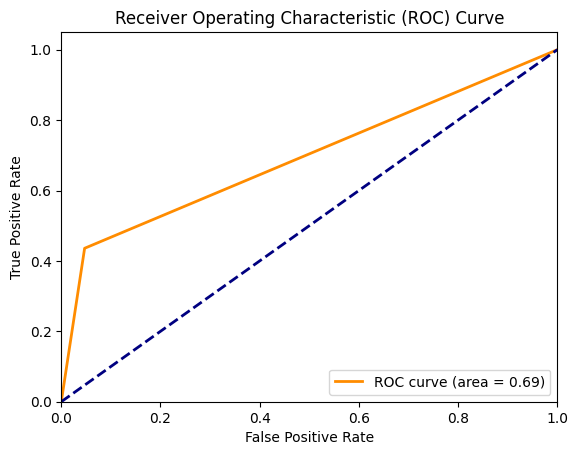

In [ ]:
fpr, tpr, _ = roc_curve(y_test, test_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Hyperparameter Tuning of the Model

In [ ]:
model = logistic_model
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882313 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.876190 (0.009278) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.875510 (0.013365) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.881633 (0.010406) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.838776 (0.001666) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.876190 (0.010670) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877551 (0.011585) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.882313 (0.011095) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.838776 (0.001666) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.882313 (0.012654) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872789 (0.011900) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.880952 (0.011383) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.838776 (0.001666) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.879592 (0.003469) with: {'C': 0.1

In [ ]:
best_solver = grid_result.best_params_['solver']
best_penalty = grid_result.best_params_['penalty']
best_C = grid_result.best_params_['C']

best_logistic_model = LogisticRegression(solver=best_solver, penalty=best_penalty, C=best_C)
best_logistic_model.fit(X, y)
y_pred = best_logistic_model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Optimized Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Optimized Model Performance:
Accuracy: 0.8945578231292517
Precision: 0.8203125
Recall: 0.4430379746835443
F1-score: 0.5753424657534246


In [ ]:
with open('optimized_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_logistic_model, file) # To save the model

# To Load the model
# with open('optimized_logistic_regression_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)